In [43]:
import pandas as pd
import json

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# results = pd.read_json('results/IterativeGPTSolver_gpt-4-1106-preview_cot:False_results.json')
# results = pd.read_json('results/IterativeGPTSolver_gpt-3.5-turbo_cot:False_results.json')

In [6]:
# for color in ['yellow', 'green', 'blue', 'purple', 'overall']:
#     at_least_one = results.groupby('puzzle_id')['solved_' + color].sum() >= 1
#     all_three = results.groupby('puzzle_id')['solved_' + color].sum() == 3
#     average = results.groupby('puzzle_id')['solved_' + color].sum().mean()

#     print(f"\nNumber of puzzles in which at least one of three seeds solved {color}: {sum(at_least_one)}")
#     print(f"Number of puzzles in which all three seeds solved {color}: {sum(all_three)}")

# Baseline Figures

In [7]:
baseline_results = pd.read_json('../results/SentenceTransformerBaseline_model-all-mpnet-base-v2_results.json')

In [8]:
clusters_baseline_results = pd.read_json('../results/ClustersBaseline_model-all-mpnet-base-v2_results.json')

In [9]:
# Add solved_at column which is the max of the solved_at color columns
baseline_results['overall_solved_at'] = baseline_results[['yellow_solved_at', 'green_solved_at', 'blue_solved_at', 'purple_solved_at']].max(axis=1)
clusters_baseline_results['overall_solved_at'] = clusters_baseline_results[['yellow_solved_at', 'green_solved_at', 'blue_solved_at', 'purple_solved_at']].max(axis=1)

In [10]:
num_solved_within_n_by_color = {}

for color in ['yellow', 'green', 'blue', 'purple', 'overall']:
    solved = baseline_results[baseline_results['solved_' + color] == True]

    num_solved_within_n = []
    for n in range(500):
        num_solved_within_n.append(sum(solved[color + '_solved_at'] <= n))

    num_solved_within_n_by_color[color] = num_solved_within_n

In [11]:
clusters_num_solved_within_n_by_color = {}

for color in ['yellow', 'green', 'blue', 'purple', 'overall']:
    solved = clusters_baseline_results[clusters_baseline_results['solved_' + color] == True]

    num_solved_within_n = []
    for n in range(500):
        num_solved_within_n.append(sum(solved[color + '_solved_at'] <= n))

    clusters_num_solved_within_n_by_color[color] = num_solved_within_n

In [36]:
print(f"Num challenge puzzles solved by MPNet in 500 guesses: {clusters_num_solved_within_n_by_color['overall'][499]}")
print(f"Proportion of challenge puzzles solved by MPNet in 5 guesses: {clusters_num_solved_within_n_by_color['overall'][5] / 250}")

Num challenge puzzles solved by MPNet in 500 guesses: 108
Proportion of challenge puzzles solved by MPNet in 5 guesses: 0.128


In [45]:
# TODO: t-test for baseline performance on normal vs. challenge
baseline_results['overall_solved_in_5'] = baseline_results['overall_solved_at'] < 5
clusters_baseline_results['overall_solved_in_5'] = clusters_baseline_results['overall_solved_at'] < 5

t, p = scipy.stats.ttest_ind(np.array(baseline_results['overall_solved_in_5'], int), np.array(clusters_baseline_results['overall_solved_in_5']), equal_var=False)
print(f"[MPNet] Normal vs. Challenge: t = {t}, p = {p}")
print(np.mean(baseline_results['overall_solved_in_5']), np.mean(clusters_baseline_results['overall_solved_in_5']))

[MPNet] Normal vs. Challenge: t = -0.40917749618519517, p = 0.6825856414925506
0.116 0.128


ValueError: The number of FixedLocator locations (125), usually from a call to set_ticks, does not match the number of labels (150).

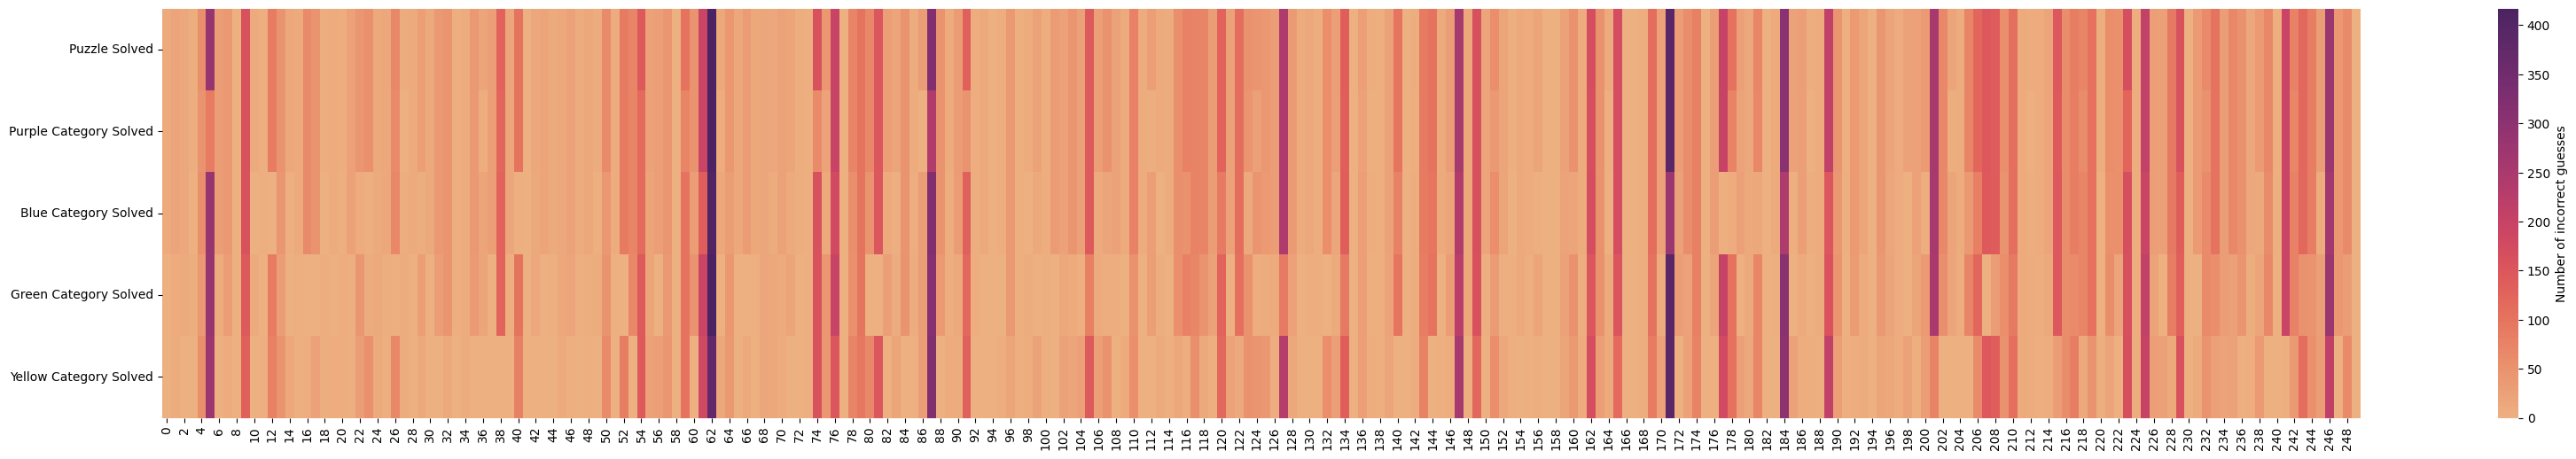

In [13]:
fig, ax = plt.subplots(figsize=(40, 6))

heatmap_data = baseline_results[reversed(['yellow_solved_at', 'green_solved_at', 'blue_solved_at', 'purple_solved_at', 'overall_solved_at'])]
heatmap_data = heatmap_data.rename(columns={'yellow_solved_at': "Yellow Category Solved", 
                                            'green_solved_at': "Green Category Solved", 
                                            'blue_solved_at': "Blue Category Solved", 
                                            'purple_solved_at': "Purple Category Solved", 
                                            'overall_solved_at': "Puzzle Solved"}).T
sns.heatmap(heatmap_data, annot=False, ax=ax, cmap="flare", cbar_kws={'label': 'Number of incorrect guesses'})

ax.set_xticklabels(range(1, 151), rotation=45, fontsize=8)
ax.set_xlabel("Puzzle ID")
ax.set_title("Number of Incorrect Guesses Before Puzzle is Solved by Category and Overall")
# Increase size of title
ax.title.set_size(20)

# heatmap_data

In [31]:
half_solved_threshold = min([i for i in range(500) if num_solved_within_n_by_color['overall'][i] >= 125])
all_solved_threshold = min([i for i in range(500) if num_solved_within_n_by_color['overall'][i] >= 250])

In [32]:
print(f"Half solved within {half_solved_threshold} guesses")
print(f"All solved within {all_solved_threshold} guesses")

Half solved within 29 guesses
All solved within 417 guesses


[0.044, 0.072, 0.1, 0.112, 0.128, 0.128, 0.14, 0.14, 0.148, 0.16, 0.16, 0.18, 0.184, 0.184, 0.188, 0.192, 0.2, 0.208, 0.212, 0.212, 0.212, 0.212, 0.216, 0.22, 0.22, 0.228, 0.236, 0.236, 0.236, 0.236, 0.236, 0.236, 0.24, 0.244, 0.244, 0.248, 0.252, 0.252, 0.252, 0.252, 0.252, 0.252, 0.252, 0.252, 0.252, 0.26, 0.26, 0.26, 0.26, 0.264, 0.264, 0.264, 0.268, 0.268, 0.268, 0.268, 0.268, 0.268, 0.272, 0.272, 0.272, 0.276, 0.276, 0.276, 0.276, 0.276, 0.276, 0.276, 0.276, 0.276, 0.284, 0.284, 0.284, 0.288, 0.292, 0.292, 0.292, 0.292, 0.292, 0.292, 0.296, 0.296, 0.296, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.304, 0.304, 0.304, 0.304, 0.304, 0.304, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.308, 0.312, 0.316, 0.316, 0.316, 0.316, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.324, 0.324, 0.324, 0.324, 0.324, 0.324, 0.324, 0.332, 0.332, 0.332, 0.336, 0.336, 0.336, 0.336, 0.336, 0.33

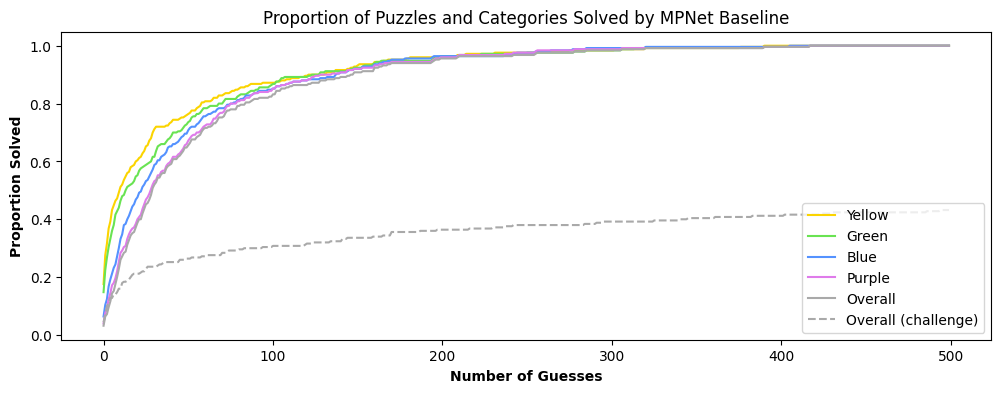

In [39]:
COLOR_MAPPING = {'yellow': '#fbd400', 'green': '#69e352', 'blue': '#5492ff', 'purple': '#df7bea', 'overall': '#A9A9A9'}

fig, ax = plt.subplots(figsize=(12, 4))

for color in ['Yellow', 'Green', 'Blue', 'Purple', 'Overall']:
    counts = num_solved_within_n_by_color[color.lower()]
    props = [count / 250 for count in counts]
    plt.plot(range(500), props, label=color, color=COLOR_MAPPING[color.lower()])

    if color == 'Overall':
        cluster_counts = clusters_num_solved_within_n_by_color[color.lower()]
        cluster_props = [count / 250 for count in cluster_counts]
        plt.plot(range(500), cluster_props, label=f"{color} (challenge)", color=COLOR_MAPPING[color.lower()], linestyle='--')

# Add vertical line at x = 5
# plt.axvline(x=5, color='black', linestyle='--')
        
# Add horizontal line at y = 0.4
# plt.axhline(y=0.4, color='black', linestyle='--')

plt.xlabel("Number of Guesses", fontweight='bold')
plt.ylabel("Proportion Solved", fontweight='bold')
plt.title("Proportion of Puzzles and Categories Solved by MPNet Baseline")
plt.legend()